<a href="https://colab.research.google.com/github/shinkarkunal/EDA_Hotel_booking/blob/main/Hotel_Booking_Analysis_Capstone_Project_KUNAL_SHINKAR_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import required libraries

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

### Load Dataset

In [3]:
# loading dataframe
hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/EDA_Project/Hotel Bookings.csv')

In [4]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Data Cleaning

##### Before exploratory analysis, the data has to be cleaned first. Cleaning of Data basically deals with Null values and Outliers.In this we try to figure out those columns which is not adding any value in our analysis and remove such columns if any. Sometimes the data might contain information that does not make any sense. These have to be fixed too.

### Handling the Null values

##### In some columns values are missing (NAN value) But before move forword for analysis we have to fill those null values or delete column which contains high amount of null values for getting better insights from Data.

In [ ]:
# sum of null values in each column
hotel_df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# lets try to find out percentage of null values present in columns
def percent_null_values(hotel_df):
  nan_percent = (hotel_df.isnull().sum()/len(hotel_df))*100
  nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False)
  return nan_percent
percent_null_values(hotel_df)


company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

##### Company Column has 94 % of Null values so its not feasible to fill that much null values so its better to drop this column.

In [ ]:
# Drop the company column
hotel_df.drop(['company'], axis = 1, inplace = True)

##### Now lets deal with Agent Column

In [ ]:
#just check From each agent how much hotels were booked
hotel_df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

##### From above data we have see that Maximum number of hotels book by agent number or agent_id 9 so that we will all null values with 9

In [ ]:
# Replace NAN value with 9
hotel_df['agent'] = hotel_df['agent'].fillna(9)

In [ ]:
# again check From each agent how much hotels were booked
hotel_df["agent"].value_counts()

9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 333, dtype: int64

##### From above information we can see that agent with ID 9 count are increased 39961 to 48301

In [ ]:
# dropping the rows with null values completely
hotel_df = hotel_df.dropna(axis=0)

##### For dealing with children and counntry column we drop those rows which has null values

In [ ]:
# sum of null values in each column
hotel_df.isna().sum().sort_values(ascending=False)

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


##### From the describe() function used earlier we spotted something fishy. The minimum value of adults column is zero. While it is possible that there are bookings with children only it is better to check those data carefully.Dataset might contain bookings with zero adults,childrens.

In [ ]:
# Check Bookings with zero adults
zero_adults = hotel_df[hotel_df.adults == 0]

In [ ]:
zero_adults.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,9.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


In [ ]:
# checking the shape of zero_adults
zero_adults.shape

(393, 31)

##### From above discussion We come to know that atleast a few of those data with zero adults have both children and babies zero as well. Which would imply that the total number of guests are zero and That does not make any sense. These data has to be considered as incorrect and will have to be dropped.It will be better to make a new column where these three categories are added together as 'all_guests' as compared to remove from data.

In [ ]:
# create new column with all_guest
hotel_df['all_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [ ]:
# check value counts for all_guest
hotel_df['all_guests'].value_counts()

2.0     81880
1.0     22289
3.0     10479
4.0      3926
0.0       170
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: all_guests, dtype: int64

##### From above information we can see that we have total 170 observation with zero guest and its not make any sense so that We will drop all the data with zero total guests

In [ ]:
# drop observation with zero adults
hotel_df.drop(hotel_df[hotel_df['all_guests']==0].index , inplace =  True)

In [ ]:
# viewing those rows with zero all_guests (to confirm)
hotel_df[hotel_df.all_guests == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_guests


##### Now we have data which does not have any null values or Irrelevent Data , we are ready to move forword

## EDA

###1) We First focus on Number of bookings canceled across both the type of hotels and its Percentages of cancellation
##### 0-> means booking is not cancelled
##### 1-> means booking is cancelled

In [ ]:
# check the number of bookings which cancelled 
cancel_count = hotel_df['is_canceled'].value_counts()
cancel_count

0    74590
1    44138
Name: is_canceled, dtype: int64

In [ ]:
# Percentage of bookings were cancelled
percentage_count = (hotel_df['is_canceled'].value_counts()/hotel_df.shape[0])*100
percentage_count

0    62.824271
1    37.175729
Name: is_canceled, dtype: float64

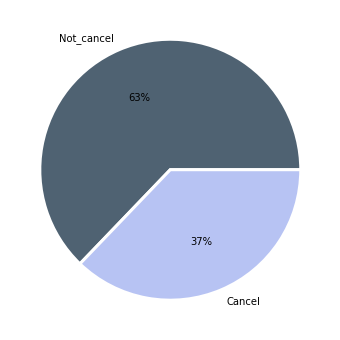

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(percentage_count,labels=['Not_cancel','Cancel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### From Total bookings around 37% of bookings were cancelled

In [ ]:
# check the number of bookings from which category of hotels 
hotel_type_count = hotel_df['hotel'].value_counts()
hotel_type_count

City Hotel      79143
Resort Hotel    39585
Name: hotel, dtype: int64

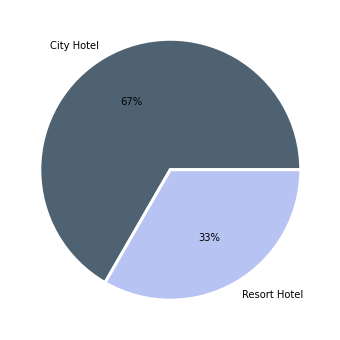

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(hotel_type_count,labels=['City Hotel','Resort Hotel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### around 67% of bookings came for City Hotel and 33% for Resort Hotel

In [ ]:
# cancelled bookings by each hotel type using group by function
cancelled_hotel_type=hotel_df.groupby(['hotel'])['is_canceled'].sum()
cancelled_hotel_type

hotel
City Hotel      33061
Resort Hotel    11077
Name: is_canceled, dtype: int64

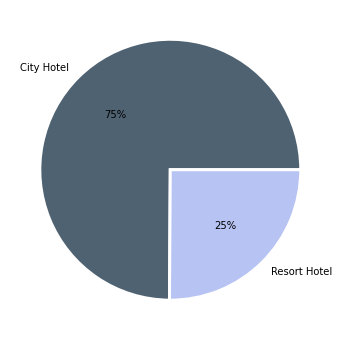

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(cancelled_hotel_type,labels=['City Hotel','Resort Hotel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### 1) From above chart we can see that cancelling rate is 75% in City hotel
##### 2) Cancelling rate in Resort hotel is less as compared to city hotel

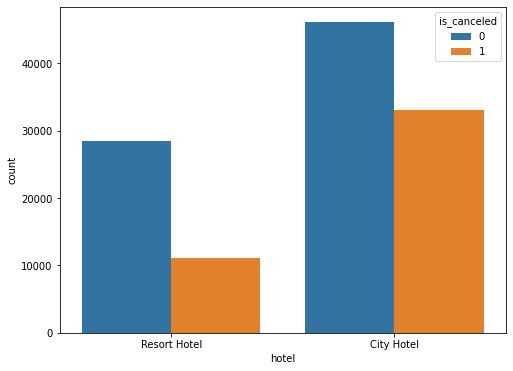

In [ ]:
# Count plot for showing status of cancellation for each hotel type
plt.figure(figsize=(8,6))
sns.countplot(x='hotel',hue='is_canceled',data=hotel_df)
plt.show()

### 2) Now lets have look into Number of bookings across the hotels

##### For this analysis we have to consider only those bookings which was not canceled

In [ ]:
# select the bookings which was not cancelled
not_cancel_bookings = hotel_df[hotel_df['is_canceled']!= 1]

In [ ]:
# Number of not cancel bookings
not_cancel_bookings.shape[0]

74590

In [ ]:
# Number of non canceled bookings from each type of hotel
not_cancel_hotel_type_booking = not_cancel_bookings['hotel'].value_counts()
not_cancel_hotel_type_booking

City Hotel      46082
Resort Hotel    28508
Name: hotel, dtype: int64

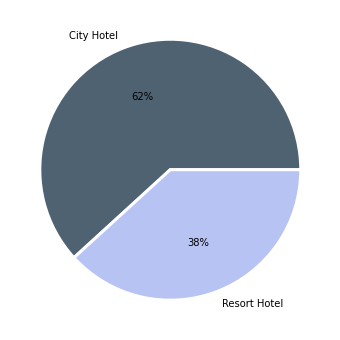

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(not_cancel_hotel_type_booking,labels=['City Hotel','Resort Hotel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### From above Pie chart we can see that around 62% bookings from City Hotel and 38% from Resort were not canceled

### 3) Number of Bookings across Arrival_date_year

In [ ]:
# Number of Bookings in each year
not_cancel_bookings['arrival_date_year'].value_counts()

2016    36051
2017    24814
2015    13725
Name: arrival_date_year, dtype: int64

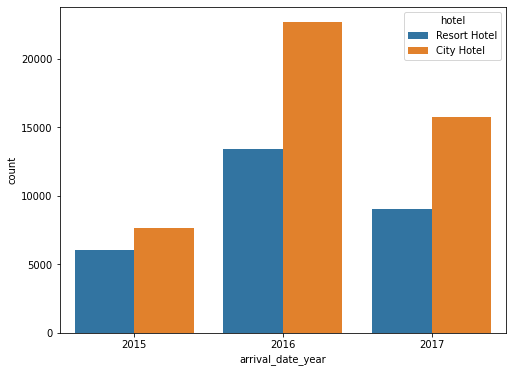

In [ ]:
# countplot for number of bookings per month in each year comparison with hotels
plt.figure(figsize=(8,6))
sns.countplot(x='arrival_date_year',hue='hotel',data=not_cancel_bookings)
plt.show()

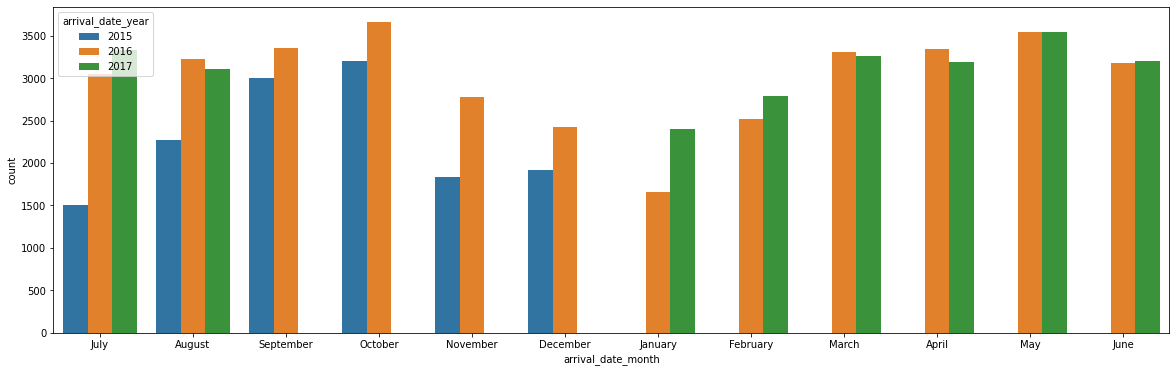

In [ ]:
# countplot for number of bookings per month on each year
plt.figure(figsize=(20,6))
sns.countplot(x='arrival_date_month',hue='arrival_date_year',data=not_cancel_bookings)
plt.show()

### 4) Number of Bookings across Arrival_date_month

In [ ]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
# arranging hotel bookings according to month index
booking_by_month = not_cancel_bookings['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month

January      4061
February     5304
March        6566
April        6528
May          7091
June         6384
July         7880
August       8604
September    6360
October      6854
November     4611
December     4347
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Number of Bookings in each Months')

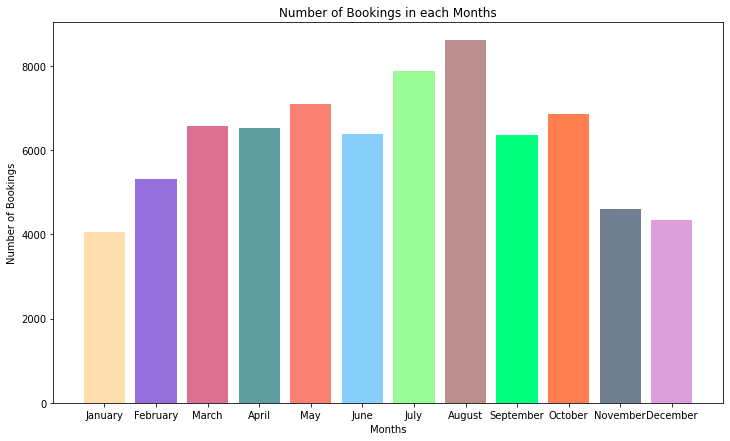

In [ ]:
# Bar plot for months vs Number of Bookings
x_axis_data = booking_by_month.index
y_axis_data = booking_by_month
plt.figure(figsize=(12,7))
plt.bar(x_axis_data,y_axis_data, color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings in each Months')

##### 1)Number of Bookings in August and July month is more as compared to other months
##### 2)From month march to October number of bookings was pretty good
##### 3)Number of Bookings decreases in last months of the year

### Monthly bookings by each type of Hotels

In [ ]:
# Bookings with City Hotel
city_hotel_bookings = not_cancel_bookings[ not_cancel_bookings['hotel'] == 'City Hotel']
# Bookings with Resort Hotel
Resort_hotel_bookings = not_cancel_bookings[ not_cancel_bookings['hotel'] == 'Resort Hotel']

In [ ]:
city_hotel_booking_by_month = city_hotel_bookings ['arrival_date_month'].value_counts().reindex(month_index)
city_hotel_booking_by_month

January      2249
February     3051
March        4049
April        4010
May          4568
June         4358
July         4770
August       5367
September    4283
October      4326
November     2674
December     2377
Name: arrival_date_month, dtype: int64

In [ ]:
Resort_hotel_booking_by_month =Resort_hotel_bookings['arrival_date_month'].value_counts().reindex(month_index)
Resort_hotel_booking_by_month

January      1812
February     2253
March        2517
April        2518
May          2523
June         2026
July         3110
August       3237
September    2077
October      2528
November     1937
December     1970
Name: arrival_date_month, dtype: int64

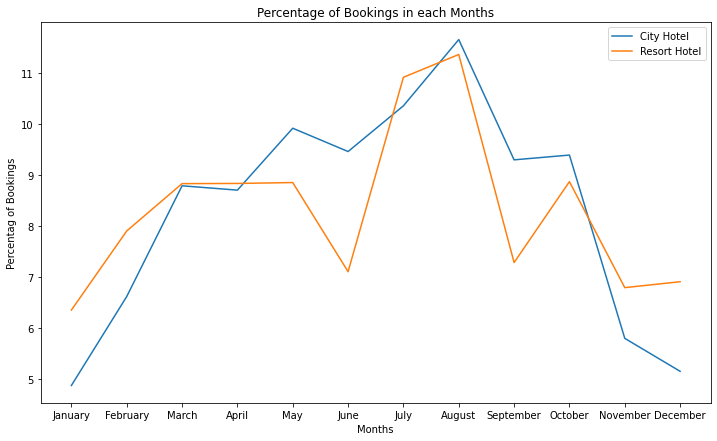

In [ ]:
# x_axis values 
city_x_axis_data = city_hotel_booking_by_month.index
resort_x_axis_data = Resort_hotel_booking_by_month.index
# y_axis values(here we calculate % of bookings of city & resort hotel in each month )
city_y_axis_data =(city_hotel_booking_by_month/city_hotel_booking_by_month.sum())*100
resort_y_axis_data =(Resort_hotel_booking_by_month/Resort_hotel_booking_by_month.sum())*100
plt.figure(figsize=(12,7))
plt.plot(city_x_axis_data,city_y_axis_data, label = 'City Hotel')
plt.plot(resort_x_axis_data,resort_y_axis_data,label = 'Resort Hotel')
plt.xlabel('Months')
plt.ylabel('Percentag of Bookings')
plt.title('Percentage of Bookings in each Months')
plt.legend()
plt.show()

##### 1) Above Line graphs shows Percentage of bookings for each months
##### 2) Number of bookings for resort hotel constant for March , april and may months.
##### 3) For months may to september bookings for city hotel is more as compared to resort hotel
##### 4) The resort hotel has a Higher percentage of booking in the beginning and end of the year (January, February, November, December) compared to the city hotel

### 5)Analysis on Number of waiting Days

In [ ]:
not_cancel_bookings['days_in_waiting_list'].value_counts().sort_values(ascending = False)

0      73256
58       164
87        76
63        51
122       51
       ...  
167        1
10         1
121        1
21         1
23         1
Name: days_in_waiting_list, Length: 97, dtype: int64

In [ ]:
# Hotel bookings having zero waiting time(in days)
non_waiting_bookings = not_cancel_bookings[ not_cancel_bookings['days_in_waiting_list'] == 0]

In [ ]:
# Number of hotel bookings having waiting time greater than equal to 1 days
waiting_bookings = not_cancel_bookings[ not_cancel_bookings['days_in_waiting_list'] >= 1]

In [ ]:
# Calculate Percentage of hotel bookings having zero waiting time
percentage_of_non_waiting_bookings = (non_waiting_bookings.shape[0]/not_cancel_bookings.shape[0])*100
percentage_of_non_waiting_bookings

98.21155650891541

In [ ]:
# Calculate Percentage of hotel bookings having zero waiting time is greater than equal to 1
percentage_of_waiting_bookings = (waiting_bookings.shape[0]/not_cancel_bookings.shape[0])*100
percentage_of_waiting_bookings

1.7884434910845959

#### From above Discussion we have around 2% of bookings have waiting time.

### Average waiting time across each month

In [ ]:
mean_waiting_time_booking = not_cancel_bookings.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
mean_waiting_time_booking

arrival_date_month
January      1.074612
February     0.139140
March        0.275815
April        1.840533
May          2.836694
June         0.645363
July         0.315736
August       0.370177
September    4.081918
October      3.632040
November     1.969855
December     2.374051
Name: days_in_waiting_list, dtype: float64

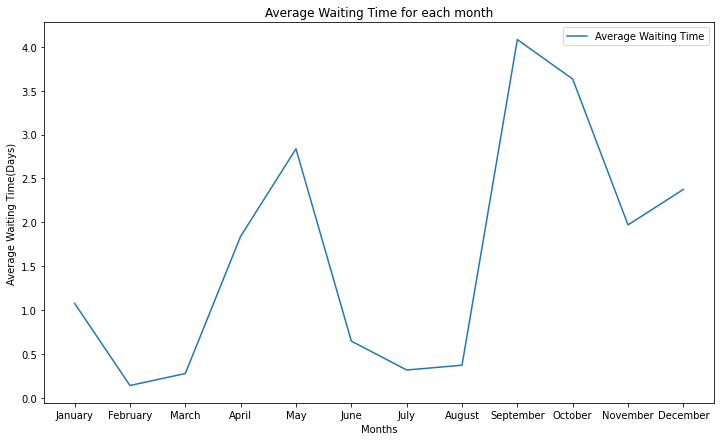

In [ ]:
# x_axis values
x_axis =mean_waiting_time_booking.index
# y_axis values
y_axis = mean_waiting_time_booking
plt.figure(figsize=(12,7))
# line plot 
plt.plot(x_axis,y_axis, label = 'Average Waiting Time')
plt.xlabel('Months')
plt.ylabel('Average Waiting Time(Days)')
plt.title('Average Waiting Time for each month')
plt.legend()
plt.show()

##### Waiting time for Hotel bookings is more in September month followed by October

### 6) Hotel bookings arrived on which week and which Day of month ?

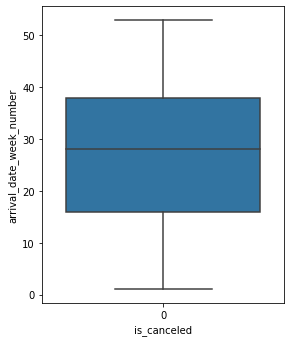

In [ ]:
# Plot Box plot for finding out percentage of bookings arrival_date_week_number
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot ( x ='is_canceled' , y = 'arrival_date_week_number' , data = not_cancel_bookings)

##### 1) 25% of bookings arrived around between 15-20th week
##### 2) 50% of bookings arrived around between 25-30th week
##### 3) 75% of bookings arrived around between 35-40th week
##### so from above discussion most of the bookings arrived in September and October month

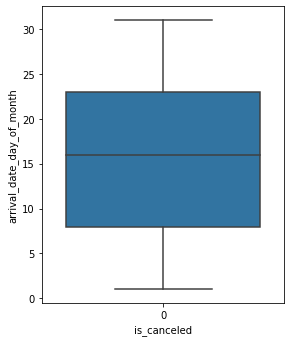

In [ ]:
# Plot Box plot for finding out percentage of bookings arrival_date_day_of_month
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot (x ='is_canceled' , y ='arrival_date_day_of_month' , data = not_cancel_bookings)

##### 1) 25% of bookings arrived around between 8-10th day of month
#####2) 50% of bookings arrived around between 15-17th day of month
#####3) 75% of bookings arrived around between 23-25th day of month
so from above discussion most of the bookings arrived in month end

### 7) Reserved & Assigned room type in hotel bookings

In [ ]:
not_cancel_bookings['reserved_room_type'].value_counts()

A    51906
D    13051
E     4578
F     2007
G     1318
B      748
C      622
H      356
L        4
Name: reserved_room_type, dtype: int64

In [ ]:
not_cancel_bookings['assigned_room_type'].value_counts()

A    40930
D    18796
E     5774
F     2806
C     1905
G     1755
B     1643
H      457
I      348
K      176
Name: assigned_room_type, dtype: int64

In [ ]:
room_index = ['A','B','C','D','E','F','G','H','L','K']
reserved_room = not_cancel_bookings['reserved_room_type'].value_counts().reindex(room_index)
reserved_room

A    51906.0
B      748.0
C      622.0
D    13051.0
E     4578.0
F     2007.0
G     1318.0
H      356.0
L        4.0
K        NaN
Name: reserved_room_type, dtype: float64

In [ ]:
assigned_room = not_cancel_bookings['assigned_room_type'].value_counts().reindex(room_index)
assigned_room

A    40930.0
B     1643.0
C     1905.0
D    18796.0
E     5774.0
F     2806.0
G     1755.0
H      457.0
L        NaN
K      176.0
Name: assigned_room_type, dtype: float64

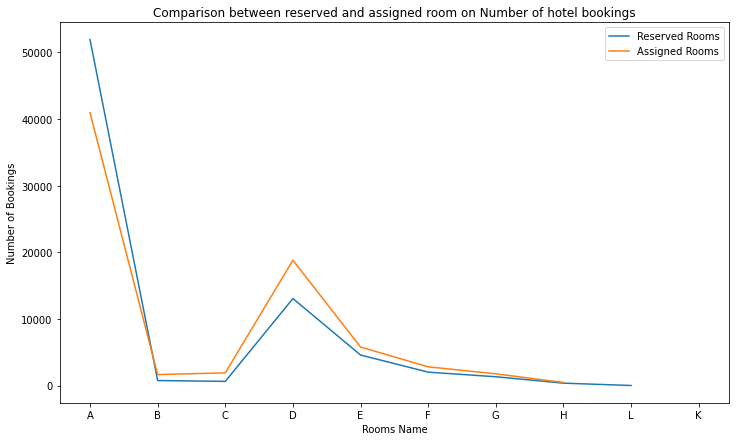

In [ ]:
# x_axis values 
reserved_room_x_axis = reserved_room.index
assigned_room_x_axis = assigned_room.index
# y_axis values
reserved_room_y_axis  =reserved_room
assigned_room_y_axis = assigned_room
plt.figure(figsize=(12,7))
plt.plot(reserved_room_x_axis,reserved_room_y_axis, label = 'Reserved Rooms')
plt.plot(assigned_room_x_axis,assigned_room_y_axis,label = 'Assigned Rooms')
plt.xlabel('Rooms Name')
plt.ylabel('Number of Bookings')
plt.title('Comparison between reserved and assigned room on Number of hotel bookings')
plt.legend()
plt.show()

#### For Room A Reserved bookings is more than assigned room from that we can conclude that Room A has more demand as compared to others

### 8) Number of Bookings by Meal Type

Text(0.5, 1.0, 'Most demandding Meal Types')

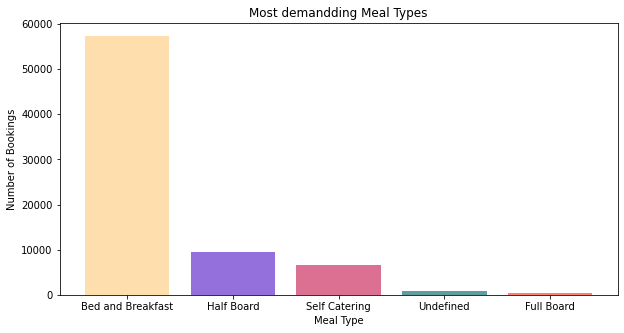

In [ ]:
meal_type = ['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
meal_count= not_cancel_bookings['meal'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(meal_type, meal_count ,color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.title('Most demandding Meal Types')

#### Most Preffered meal type was BB(Bread & Breakfast)

### 9)Repeated Guests

In [ ]:
repeated_guest = not_cancel_bookings['is_repeated_guest'].value_counts()
repeated_guest

0    71389
1     3201
Name: is_repeated_guest, dtype: int64

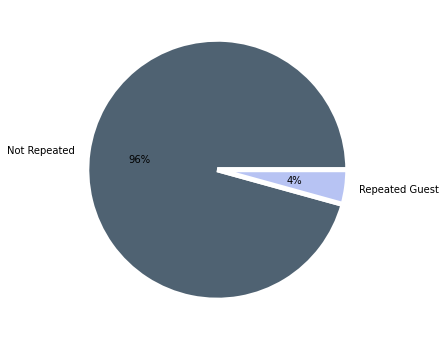

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(not_cancel_bookings['is_repeated_guest'].value_counts(),labels=['Not Repeated','Repeated Guest'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },colors=colors)
plt.show()

#### Only 4% of bookings came from Repeated Guest

### 10) Hotel Bookings across the contries

In [ ]:
# Number of bookings fro each country store in one variable
number_of_bookings_from_each_country = not_cancel_bookings['country'].value_counts() 

In [ ]:
# Top 15 counties which has highest amount of hotel bookings
number_of_bookings_from_each_country.head(15)

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
BRA     1392
CHE     1298
AUT     1033
CN      1025
SWE      793
Name: country, dtype: int64

In [ ]:
Bookings_from_country = number_of_bookings_from_each_country.head(15)
country_names = ['Portugal','United Kingdom','France','Spain','Germany','Ireland','Italy','Belgium','Netherlands','USA','Brazil','Switzerland','Austria','China','Sweden']

Text(0.5, 1.0, 'Hotel Bookings across the contries')

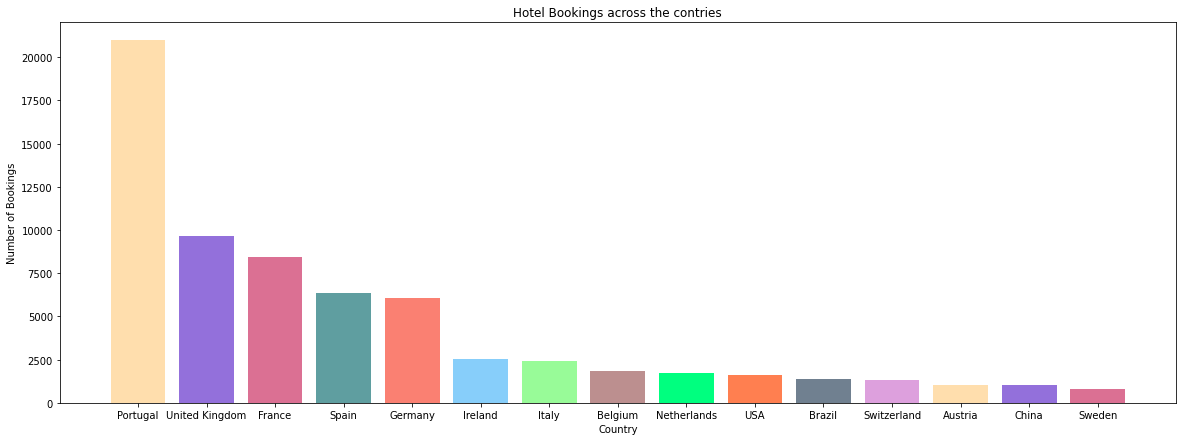

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(country_names,Bookings_from_country, color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Hotel Bookings across the contries')

#### The Highest number of bookings came from Portugal followed by UK

### 11) Number of Nights stays

In [ ]:
# Total nights both on week days as well as week ends
not_cancel_bookings['Total_night_stays'] = not_cancel_bookings['stays_in_weekend_nights'] + not_cancel_bookings['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# check for total_nights counts 
total_nights_count = not_cancel_bookings['Total_night_stays'].value_counts()
total_nights_count.head(16).sort_index()

0       617
1     15523
2     15365
3     15682
4     10996
5      5098
6      2309
7      5671
8       710
9       524
10      775
11      273
12      122
13       88
14      653
15       36
Name: Total_night_stays, dtype: int64

In [ ]:
total_nights_stay = total_nights_count.head(16).sort_index()

Text(0.5, 1.0, 'Hotel Bookings across the contries')

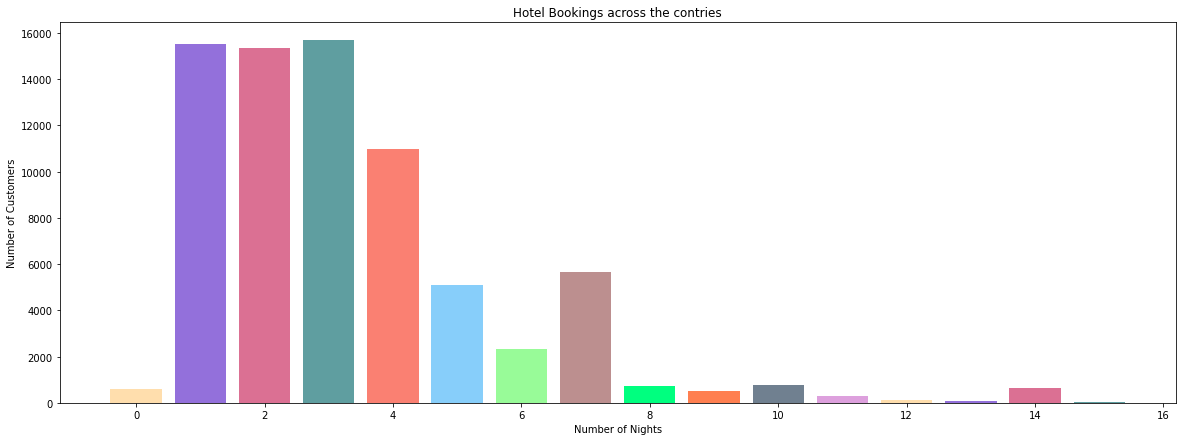

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(total_nights_stay.index,total_nights_stay , color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Number of Nights')
plt.ylabel('Number of Customers')
plt.title('Hotel Bookings across the contries')

### 12) Average Daily Rate (ADR)

#### Average daily rate (ADR) is an important indicator because it reflects the average price that customers are paying for hotel rooms on a given period of time.
#### To find ADR, divide your total room revenue by the number of rooms sold.

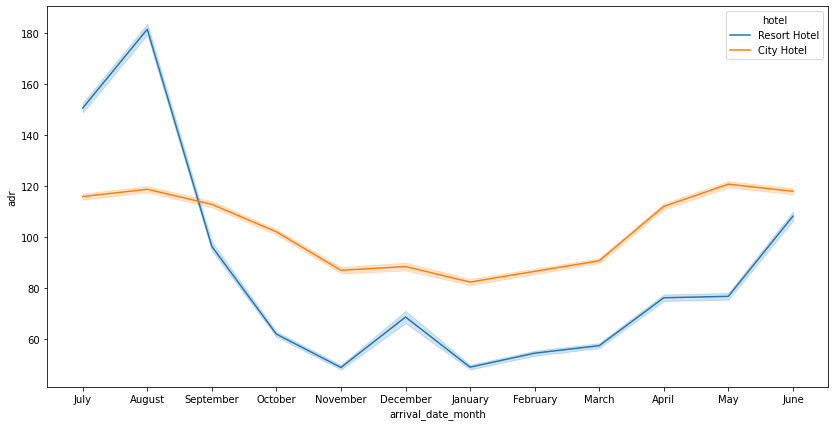

In [ ]:
# Lets Visualize ADR value for each month for both the hotels
plt.figure(figsize=(14,7))
sns.lineplot(x = 'arrival_date_month', y = 'adr', hue= 'hotel', data = not_cancel_bookings)

#### Average Daily rate for Resort type hotel is much more than city hotel in month of July and August.
#### ADR has more fluctuation in Resort hotel that city hotel.

### lets check Correleation of all features

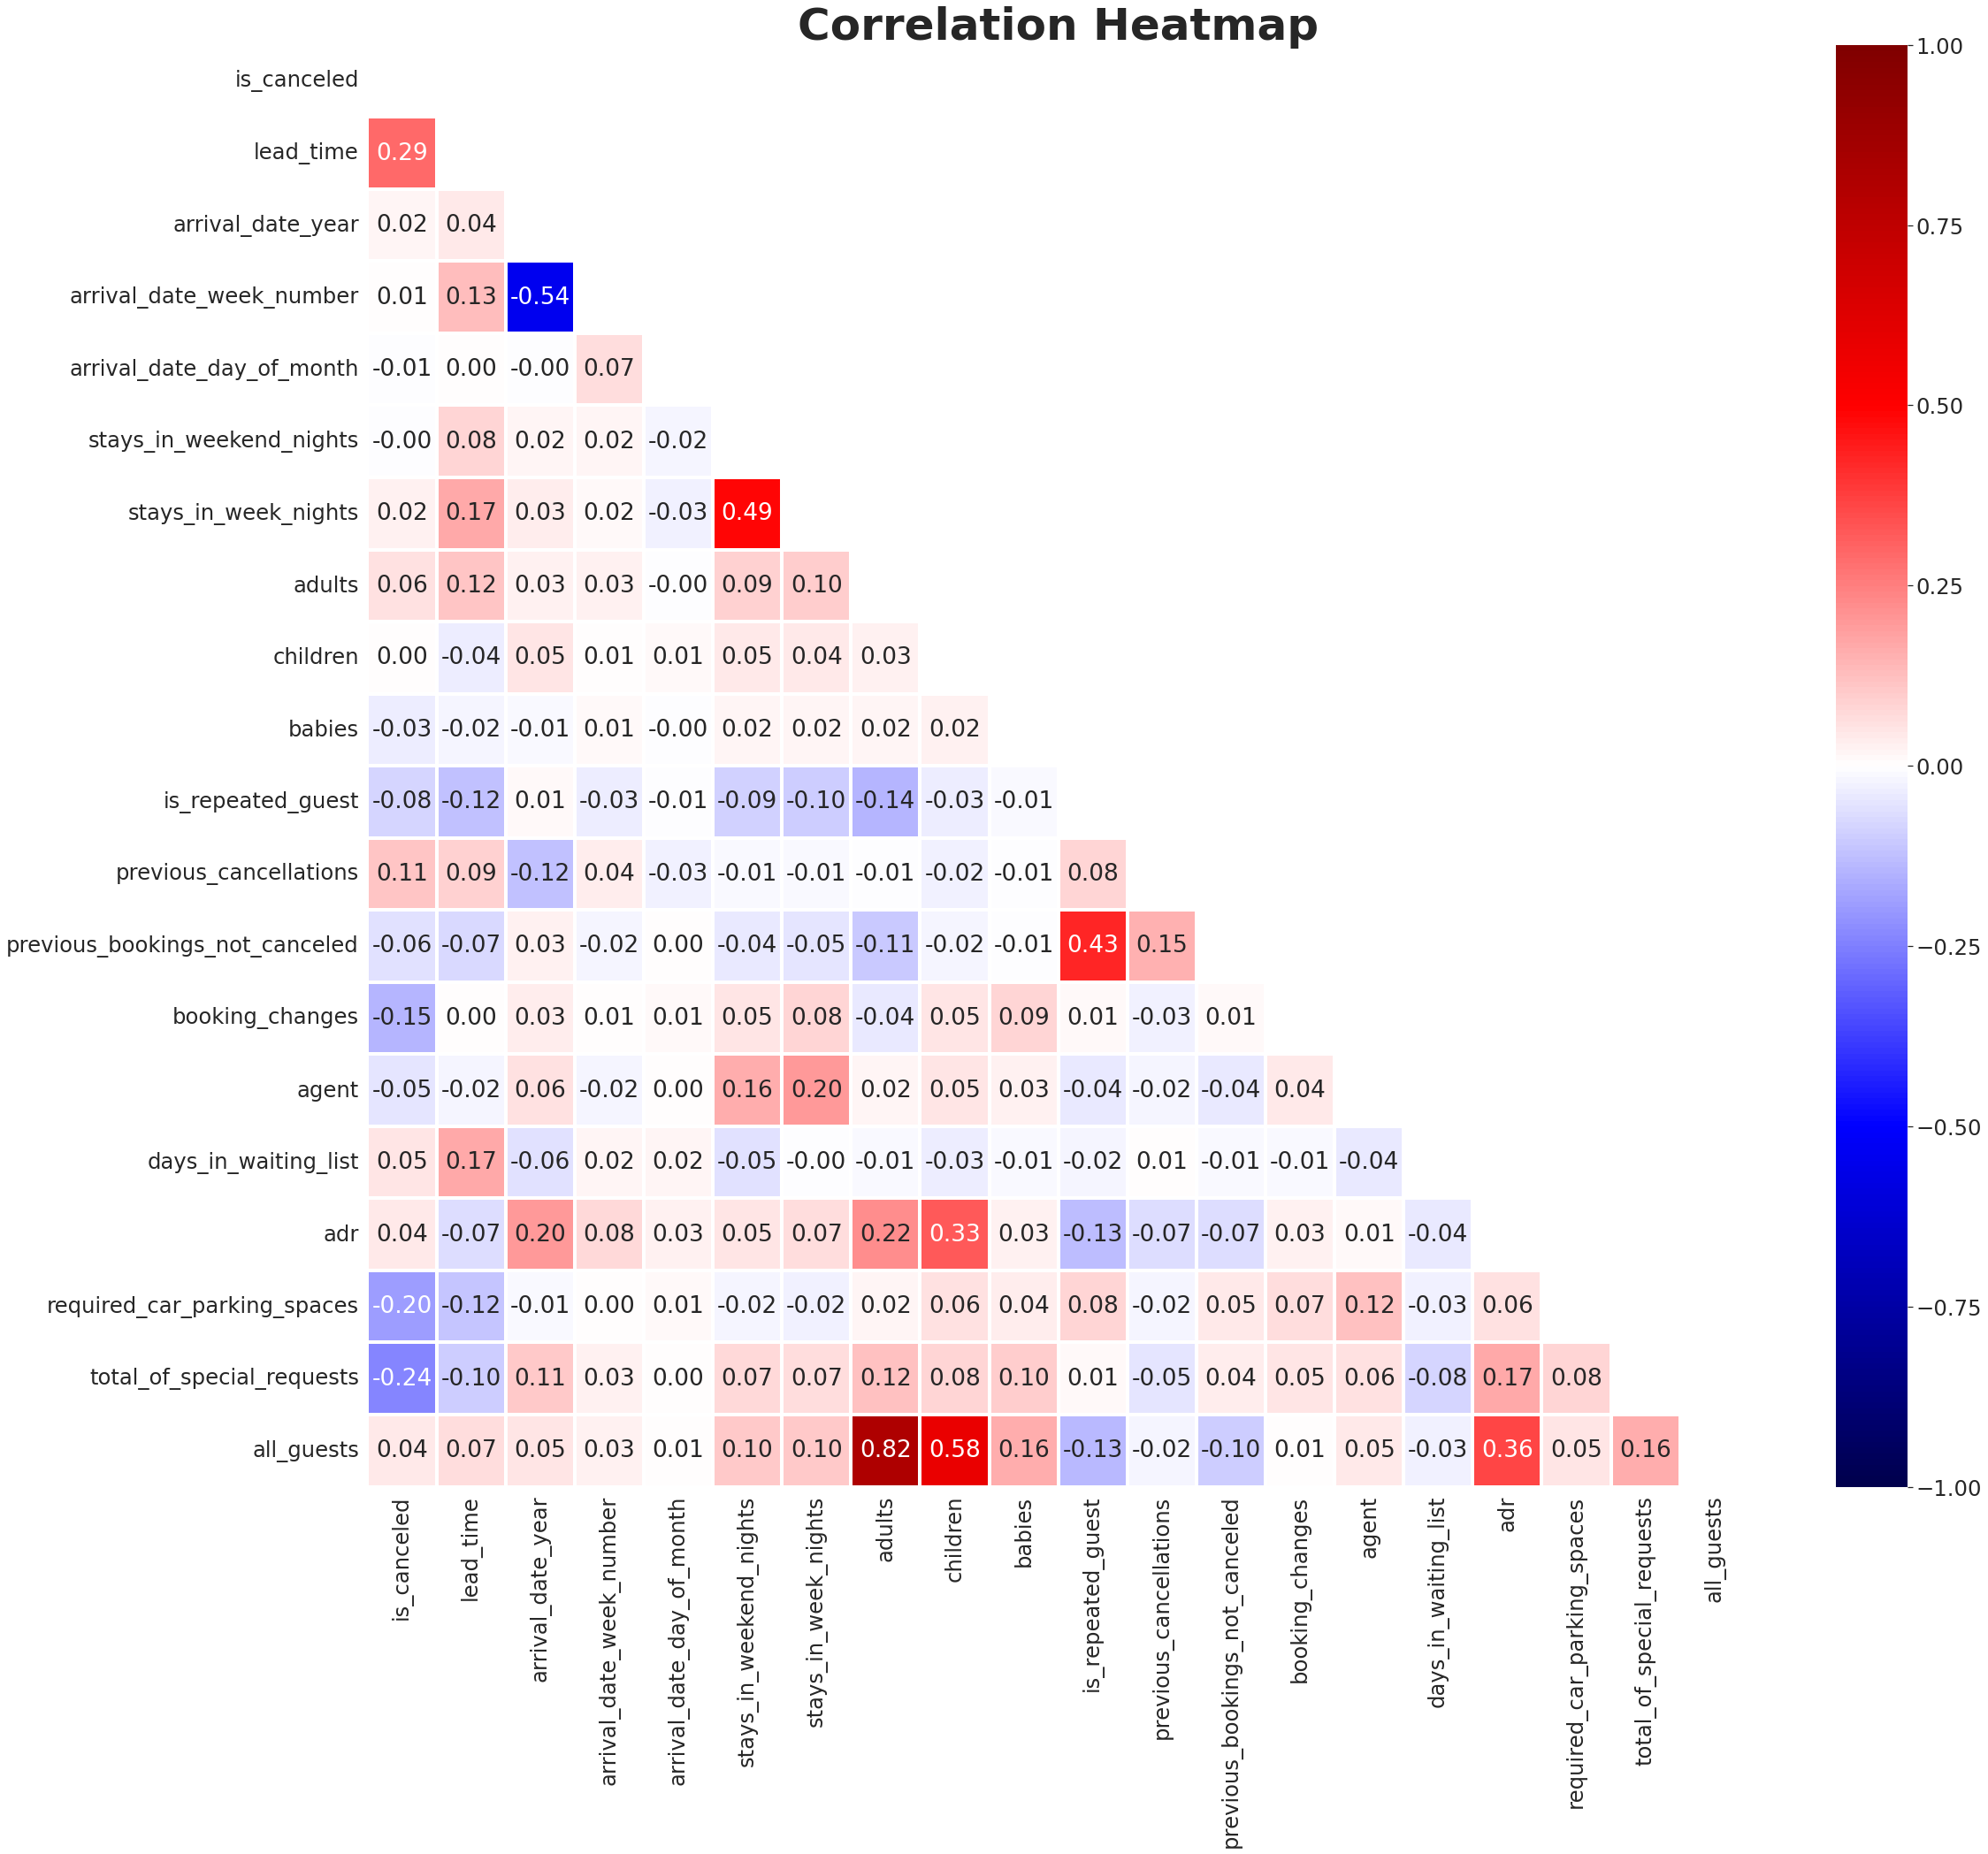

In [ ]:
corr_matrix = hotel_df.corr()
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

#### 1. It can be observed arrival_date_week_number and arrival_date_year are 54% negative correlated
#### 2. previous_bookings_not_cancelled and is_repeated_guest are 42% positive correleated
#### 3. adr and children are positive correlated by 33%

### Conclusion From above analysis :

#### 1) From all the bookings 63% bookings were cancelled.
#### 2) Around 67 % bookings from City hotel and 33% from Resort hotel.
#### 3) From the all bookings of City hotel 75% bookings were cancelled.
#### 3) From the all bookings of Resort hotel 25% bookings were cancelled.
#### 4) Bookings which was not cancelled was 62 % from city hotel and 38% from resort hotel.
#### 5) Number of Bookings in August and July month is more as compared to other months
#### 6) Waiting time for Hotel bookings is more in September month followed by October
#### 7) For Room A Reserved bookings is more than assigned room from that we can conclude that Room A has more demand as compared to others.
#### 8) Most Preffered meal type was BB(Bread & Breakfast)
#### 9) Only 4% of bookings came from Repeated Guest
#### 10) Among all the countries in the dataset, PRT(Portugal) has got the maximum number of hotel bookings.
#### 11) Average Daily rate for Resort type hotel is much more than city hotel in month of July and August.